In [1]:
## ========================= Problem 1 =================================== ##

import numpy as np
import math
import statsmodels.api as sm
from scipy.stats import levy_stable
import matplotlib.pyplot as plt

## ========================== Parameter Declaration ========================== ##

window_size = 100 # t
filter_order = 5
alpha = 1.8
lamda = 1

## =========================== Generate Sampeles =========================== ##

# Samples of input-output pairs
sample_size = 10000
# sample_index = np.linspace(0, 1, sample_size+10)
# filter_x = [math.exp(-lamda * np.power(abs(sample_index[i]), alpha)) for i in range(len(sample_index))] # from the 10th

# mean, var, skew, kurt = levy_stable.stats(alpha = alpha, c = lamda, moments='mvsk')

filter_x = levy_stable.rvs(alpha = alpha, beta = 0, size = sample_size + 10)


# The input to the plant
filter_y = np.zeros((sample_size))
for i in range (9, sample_size + 9):
    filter_y[i-9] = np.sum(filter_x[i-9:i+1]) # actual value
    
# filter_input_x = filter_x[10:sample_size+10]
filter_input_x = filter_x[10:sample_size+10]
filter_output_y = filter_y.copy()

# Generate white noise
mu = 0
sigma = 0.1
filter_noise = np.random.normal(mu, sigma, sample_size)

# Output of the filter
filter_output_noise_y = filter_output_y + filter_noise

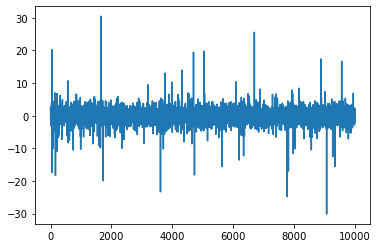

In [2]:
plt.plot(filter_input_x)

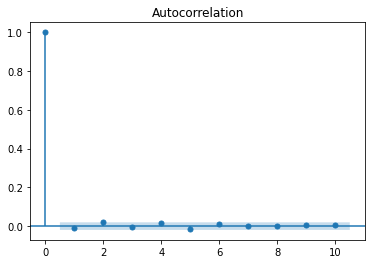

In [3]:
# ACF of input
from statsmodels.graphics import tsaplots

# ACF_of_input = sm.tsa.acf(x = filter_x, nlags = 100)
fig = tsaplots.plot_acf(x = filter_input_x, lags=10)
plt.show()

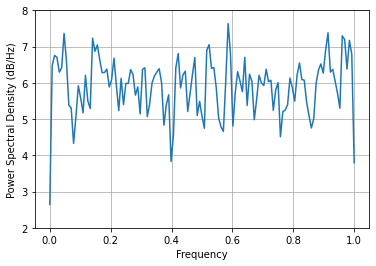

In [4]:
l11 = plt.psd(filter_input_x)
plt.show()

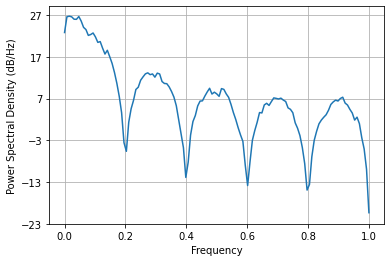

In [5]:
# PSD of output without noise
l1 = plt.psd(filter_output_y)
plt.show()

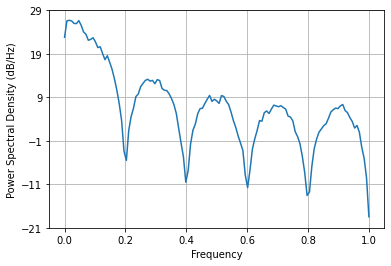

In [6]:
# PSD of output with noise
# fig, ax = plt.subplots(1, 1)
#ax.hist(filter_x, density=True, histtype='stepfilled', alpha=0.2)

# aa = sm.tsa.acf(filter_input_x)
l1 = plt.psd(filter_output_noise_y)
plt.show()

In [123]:
# Wiener Filter
from scipy.linalg import toeplitz
import scipy
from scipy.ndimage.interpolation import shift
# filter_input_x, filter_output_y

filter_order = 15 # 5, 15, 30
window_size = 500 # 500, 1000
# window_start = np.random.randint(50, 9000)
# window_filter_x = filter_input_x[window_start:window_start+window_size]
# window_filter_y = filter_output_noise_y[window_start:window_start+window_size]

window_filter_x = np.array([filter_input_x[filter_order-i:window_size+filter_order-i] for i in range(filter_order)])
window_filter_y = filter_output_noise_y[filter_order:window_size+filter_order]

# ACF
R = np.zeros((filter_order, filter_order))
for i in range (R.shape[0]):
    for j in range (R.shape[1]):
        R[i, j] = np.dot(window_filter_x[i], window_filter_x[j])
print(R)
#R = np.corrcoef(window_filter_x)
#print(R.shape)
#R
#R = sm.tsa.acf(x = window_filter_x, nlags = filter_order-1)
#R = toeplitz(R)

[[ 1.43456469e+03 -5.32464807e+01 -6.09544035e+00  9.80750174e+01
   4.22336855e+01 -1.42145379e+02  5.26179073e+01  4.98588797e+01
   3.39430124e+00 -6.43772126e+01  1.03830321e+02 -4.01354555e+01
   2.25965647e+01  6.80139617e+01 -7.78835771e+01]
 [-5.32464807e+01  1.43334721e+03 -5.55302720e+01 -7.46368815e+00
   9.96218519e+01  4.17738180e+01 -1.43707434e+02  5.38743272e+01
   4.94349900e+01  1.92363477e+00 -6.31819898e+01  1.07039473e+02
  -4.01103942e+01  2.13024818e+01  6.59449207e+01]
 [-6.09544035e+00 -5.55302720e+01  1.42922974e+03 -5.75042910e+01
  -4.96100681e+00  9.82078629e+01  3.92198637e+01 -1.40800405e+02
   5.24650172e+01  4.66349337e+01  3.61733013e+00 -5.68320218e+01
   1.07276583e+02 -4.22670804e+01  1.65670994e+01]
 [ 9.80750174e+01 -7.46368815e+00 -5.75042910e+01  1.42980057e+03
  -5.71853298e+01 -7.43962117e+00  9.77909499e+01  4.25895431e+01
  -1.43462072e+02  5.06651693e+01  4.60270796e+01  8.39854956e+00
  -5.61274585e+01  1.06785786e+02 -4.76317308e+01]
 [ 4

In [124]:
# Cross-correlation
from scipy.ndimage.interpolation import shift

P = np.zeros((filter_order))
for i in range (window_filter_x.shape[0]):
    P[i] = np.dot(window_filter_x[i], window_filter_y)
print(P)
#P = [np.corrcoef(window_filter_y, window_filter_x[i])[0,1] for i in range(filter_order)]
#P

[  81.61089373 1410.23551657 1405.38857432 1391.15335014 1462.67730973
 1450.27890499 1432.88137226 1445.0793932  1402.84918582 1407.07078817
 1404.23336738   90.23451593  105.09252436  121.58482608   99.41378822]


In [126]:
hopt = np.matmul(np.linalg.inv(R), P)
np.around(hopt, 3)

array([-1.000e-03,  9.990e-01,  9.960e-01,  9.980e-01,  1.007e+00,
        1.005e+00,  9.990e-01,  9.980e-01,  9.980e-01,  1.001e+00,
        1.001e+00,  0.000e+00, -2.000e-03, -3.000e-03,  1.000e-03])

In [127]:
# Calculate Weight Accuracy
W_opt = np.zeros((filter_order))
if filter_order <= 10:
    W_opt[:] = 1
else:
    W_opt[0:10] = 1

# WSNR
W_error = W_opt - hopt
WSNR = 10 * math.log10(np.dot(W_opt, W_opt)/np.dot(W_error, W_error))
WSNR

6.981824529590375

(500,)


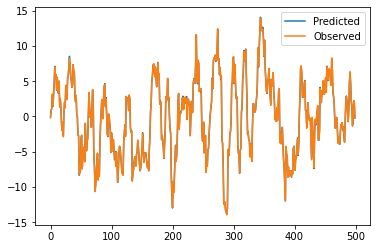

In [128]:
y_hat = np.matmul(hopt, window_filter_x)
print(y_hat.shape)
l1 = plt.plot(y_hat)
l2 = plt.plot(window_filter_y)
plt.legend(['Predicted', 'Observed'])
plt.show()

In [13]:
'''
# Wiener Filter
# from scipy.linalg import toeplitz
import scipy
# filter_input_x, filter_output_y

filter_order = 5 # 15, 30
window_size = 100 # 500, 1000
# window_start = np.random.randint(50, 9000)
# window_filter_x = filter_input_x[window_start:window_start+window_size]
# window_filter_y = filter_output_noise_y[window_start:window_start+window_size]

window_filter_x = filter_input_x[0:window_size]
window_filter_y = filter_output_noise_y[0:window_size]

R = sm.tsa.acf(x = window_filter_x, nlags = filter_order-1)


#window_filter_x_order = filter_input_x[window_start-filter_order:window_start+window_size-filter_order]

# auto-correlation

xxcorr = np.zeros((filter_order, filter_order))
for i in range (filter_order):
    #window_filter_xi = filter_input_x[window_start-i:window_start+window_size-i]
    #window_filter_yi = filter_output_noise_y[window_start-i:window_start+window_size-i]
    for j in range (i, filter_order):
        #window_filter_xj = filter_input_x[window_start-j:window_start+window_size-j]
        #window_filter_yj = filter_output_noise_y[window_start-j:window_start+window_size-j]
        xxcorr[i,j] = np.dot(window_filter_x[i:window_size-j], window_filter_x[j:window_size-i])
xxcorr = xxcorr + np.triu(xxcorr,1).T


xxcorr_long = np.convolve(window_filter_x, window_filter_x_order, mode = 'full')
xxcorr = xxcorr_long[window_size-1:]
R = toeplitz(xxcorr)


# cross-correlation
xycorr = np.zeros((filter_order))
for i in range (filter_order):
    xycorr[i] = np.dot(window_filter_x[i:], window_filter_y[i:])

xycorr_long = np.convolve(window_filter_x, window_filter_y, mode = 'full')
xycorr = xycorr_long[window_size-1:]


# matrix inverse * 
hopt = np.matmul(np.linalg.inv(xxcorr), xycorr)
y_hat = []
for i in range (len(window_filter_x)-filter_order):
    y_hat.append(np.dot(hopt, np.flip(window_filter_x[i:i+filter_order])))
y_hat = np.array(y_hat)
print(y_hat)

# Apply wiener filter


y_hat_long = np.convolve(filter_input_x, hopt, mode = 'full')
y_hat = y_hat_long[0]
print(y_hat_long)
print(filter_output_noise_y)
'''

"\n# Wiener Filter\n# from scipy.linalg import toeplitz\nimport scipy\n# filter_input_x, filter_output_y\n\nfilter_order = 5 # 15, 30\nwindow_size = 100 # 500, 1000\n# window_start = np.random.randint(50, 9000)\n# window_filter_x = filter_input_x[window_start:window_start+window_size]\n# window_filter_y = filter_output_noise_y[window_start:window_start+window_size]\n\nwindow_filter_x = filter_input_x[0:window_size]\nwindow_filter_y = filter_output_noise_y[0:window_size]\n\nR = sm.tsa.acf(x = window_filter_x, nlags = filter_order-1)\n\n\n#window_filter_x_order = filter_input_x[window_start-filter_order:window_start+window_size-filter_order]\n\n# auto-correlation\n\nxxcorr = np.zeros((filter_order, filter_order))\nfor i in range (filter_order):\n    #window_filter_xi = filter_input_x[window_start-i:window_start+window_size-i]\n    #window_filter_yi = filter_output_noise_y[window_start-i:window_start+window_size-i]\n    for j in range (i, filter_order):\n        #window_filter_xj = filter

In [38]:
'''
# LMS Algorithm

# filter_input_x, filter_output_y

# initialization and searching techniques
import padasip as pa

# creation of data
#x = np.array([shift(window_filter_x, lag) for lag in range (filter_order)]).T

# identification
f = pa.filters.FilterNLMS(n = filter_order, mu = 0.000000000001, w = "random")
y, e, w = f.run(window_filter_y, window_filter_x.T)
print(w[0])

# Calculate WSNR
W_error = W_opt - w[0]
WSNR = 10 * math.log10(np.dot(W_opt, W_opt)/np.dot(W_error, W_error))
WSNR
'''

[-0.10377252 -0.05818866 -0.30162197  0.30109914 -0.83133156 -0.02104611
 -0.10816337  0.08993805  0.71976422 -0.53252514 -1.20871056 -0.04019996
  0.07919838 -0.39967158  0.44328594]


-1.825739393641329

[-0.00917909 -0.3087183   0.22698228 -0.61140889  0.64803647 -0.53424142
  0.44636592 -0.23086105  0.30591803  0.68473387  0.29074202  0.62255222
 -0.22852215 -0.14881328  1.0026683 ]


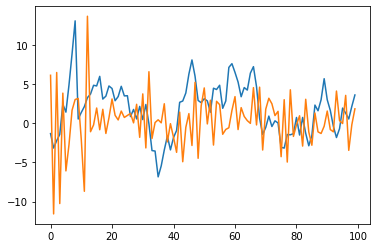

-0.9193560627238466

In [44]:
'''
# LMS Algorithm

import padasip as pa


f = pa.filters.FilterNLMS(n = filter_order, mu = 0.0001, w = "random")
y, e, w = f.run(window_filter_y, window_filter_x.T)
print(w[0])
#print(e)

plt.plot(window_filter_y)
plt.plot(y)
plt.show()

# Calculate WSNR
W_error = W_opt - w[0]
WSNR = 10 * math.log10(np.dot(W_opt, W_opt)/np.dot(W_error, W_error))
WSNR
'''

In [133]:
# LMS Algorithm

import padasip as pa

weight_filter = np.zeros((filter_order))

weight_error = 10000
weight_threshold = 0.00000001

mu = 0.01

n = 0

while (n <= window_filter_y.shape[0]-1):
    e_n = window_filter_y[n] - np.dot(weight_filter, window_filter_x[:, n])
    weight_filter_new = weight_filter + mu * window_filter_x[:, n] * e_n
    # weight_error = np.sum((weight_filter_new - weight_filter) ** 2)/len(weight_filter)
    weight_filter = weight_filter_new
    n = n + 1

w_optimal = weight_filter
print(n)
print(w_optimal)

# Calculate WSNR
W_error = W_opt - w_optimal
WSNR = 10 * math.log10(np.dot(W_opt, W_opt)/np.dot(W_error, W_error))
WSNR

500
[-0.01230035  0.99270942  0.99926353  1.00326729  1.00534825  1.00445724
  0.99234103  0.98617254  0.98794317  1.00490997  0.99978236 -0.00401796
 -0.00479503 -0.0102725   0.01433323]


6.935322860099406

(500,)


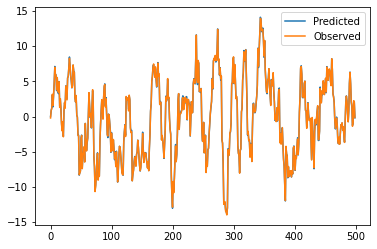

In [134]:
y_hat = np.matmul(w_optimal, window_filter_x)
print(y_hat.shape)
l1 = plt.plot(y_hat)
l2 = plt.plot(window_filter_y)
plt.legend(['Predicted', 'Observed'])
plt.show()

In [58]:
(n <= window_filter_y.shape[0]) & (weight_error > weight_threshold)

True

In [33]:
import sympy

x = sympy.symbols('x')
sympy.simplify((1-np.power(x, -10))/(1-np.power(x, -1)))

(x**10 - 1)/(x**9*(x - 1))

In [24]:
sympy.expand(sympy.factor((np.power(x, 10)-1)/(x-1)))

x**9 + x**8 + x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x + 1